## Importación de librerias


In [3]:
# Tratamiento de datos.
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import locale as lc

# Visualizaciones.
import matplotlib.pyplot as plt
import seaborn as sns

## Carga de datos de bank-additional.csv

Vamos a tratar la columna ``date`` como tipo de dato datetime. 

In [4]:
df_bank = pd.read_csv('../data/raw/bank-additional.csv', parse_dates=['date'], date_format='%d-%B-%Y')

In [5]:
df_bank.head()

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
0,0,NaN,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857",5191,no,2-agosto-2019,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079
1,1,57.0,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,14-septiembre-2016,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097
2,2,37.0,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857",5191,no,15-febrero-2019,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,3,40.0,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,29-noviembre-2015,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e
4,4,56.0,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,29-enero-2017,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


### Análisis de fechas

Cambiamos el tipo de datos de la columna ``date`` de object a datetime. 


In [6]:
lc.setlocale(lc.LC_TIME, 'es_ES')
df_bank['date']

0             2-agosto-2019
1        14-septiembre-2016
2           15-febrero-2019
3         29-noviembre-2015
4             29-enero-2017
                ...        
42995       13-octubre-2015
42996         17-marzo-2018
42997    15-septiembre-2016
42998    23-septiembre-2019
42999      6-noviembre-2019
Name: date, Length: 43000, dtype: object

## Selección de columnas

Vamos a eliminar las columnas que no nos aportan información relevante:

- Unnamed :

- dadefault : 

- loan :

- contact :

- duration :

- poutcome :

- latitude :

- longitude :





### Eliminar duplicados

In [7]:
df_bank.duplicated().sum()

np.int64(0)

Como podemos ver no existen duplicados.

In [8]:
columns_eliminar = 

df_bank.drop( columns= columns_eliminar)

SyntaxError: invalid syntax (919454763.py, line 1)

In [9]:
df_bank.duplicated().sum()

np.int64(0)

## Limpieza de datos


In [10]:
df_bank.columns

Index(['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'contact', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'date', 'latitude',
       'longitude', 'id_'],
      dtype='object')

### Columna `age`


In [11]:
print(f"El número de valores nulos en la columna age es: {df_bank['age'].isna().sum()}")


El número de valores nulos en la columna age es: 5120


In [12]:
print(f"El tanto porciento de valores nulos en la columna age es: {df_bank['age'].isna().mean().round(2)*100}")


El tanto porciento de valores nulos en la columna age es: 12.0


In [13]:
print(f"La media de la columna age es: {df_bank['age'].mean().round(2)}%")


La media de la columna age es: 39.98%


In [14]:
umbral_edad_inferior = 40
print(f"El número de personas por debajo de los 40 años es: {(df_bank['age'] < umbral_edad_inferior).sum()}")
print(f"El número de personas por encima de los 40 años es: {(df_bank['age'] > umbral_edad_inferior).sum()}")
print(f"El número total de personas es: {(df_bank['age'] < umbral_edad_inferior).sum() + (df_bank['age'] > umbral_edad_inferior).sum()}")

El número de personas por debajo de los 40 años es: 20875
El número de personas por encima de los 40 años es: 15938
El número total de personas es: 36813


### Columna `date`

In [15]:
df_bank['date'].isna().sum()

np.int64(248)

### Remplazo en columnas , por .

Se cambian las , por . en las columnas ``cons.price.idx``, ``cons.conf.idx``, ``euribor3m`` porque aparecen como tipo object y son tipo float64.

In [16]:
columns_cambio = ['cons.price.idx', 'cons.conf.idx', 'euribor3m']

for col in columns_cambio:
    if df_bank[col].dtype == 'object':
        df_bank[col] = df_bank[col].str.replace(',','.').astype(float)

print(df_bank['cons.price.idx'].dtype)
print(df_bank['cons.conf.idx'].dtype)
print(df_bank['euribor3m'].dtype)

float64
float64
float64


Se cambian las , por . en la columna ``nr.employed`` porque aparecen como tipo object y es tipo int64.

In [17]:
if df_bank['nr.employed'].dtype == 'object':
    df_bank['nr.employed'] = df_bank['nr.employed'].str.replace(',', '.').astype(float).astype(int)

print(df_bank['nr.employed'].dtype)

int64


### Convierto en Int.

Se convierte la columna ``age`` en tipo int64 porque la edad es un número entero, no decimal.

In [18]:
df_bank['age'] = df_bank['age'].astype('Int64')  

print(df_bank['age'].dtype)

Int64


### Cambiamos los 1 por Si y los 0 por No.

En las columnas ``default``, ``housing``, ``loan`` cambiamos los valores 1 por Si y 0 por No, para enteder mejor el contenido cada columna.

In [19]:
columns_cambio2 = ["default", "housing", "loan"]

df_bank[columns_cambio2] = df_bank[columns_cambio2].replace({1: "Si", 0: "No"})

df_bank[columns_cambio2].head()

,default,housing,loan
0,No,No,No
1,NaN,No,No
2,No,Si,No
3,No,No,No
4,No,No,Si


### Eliminamos la columna ``Unnamed: 0``, latitude y longitude por no aportar ningun valor real.

In [20]:
df_bank.drop(columns=['Unnamed: 0', 'latitude', 'longitude'], inplace=True)

## Histogramas



In [21]:
columns_num = df_bank.select_dtypes(include='number').columns

columns_num

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

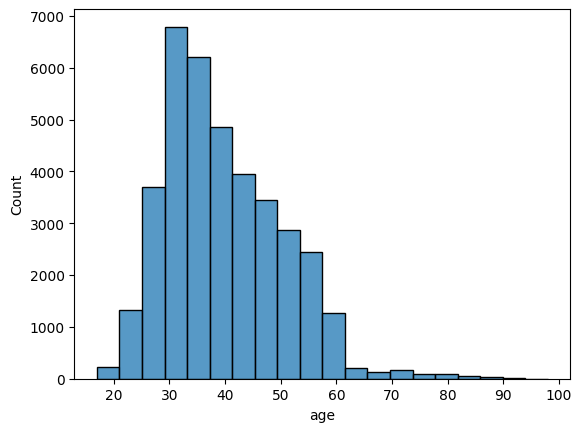

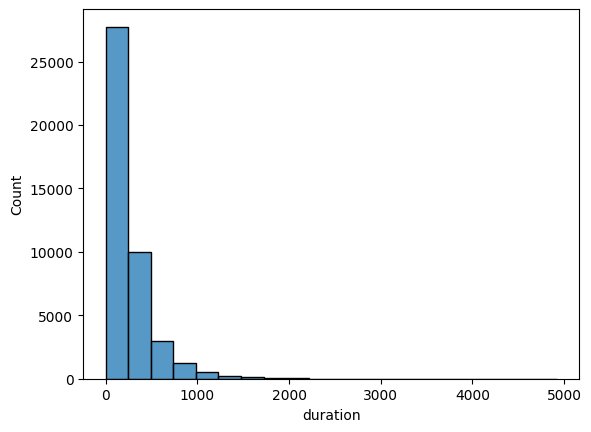

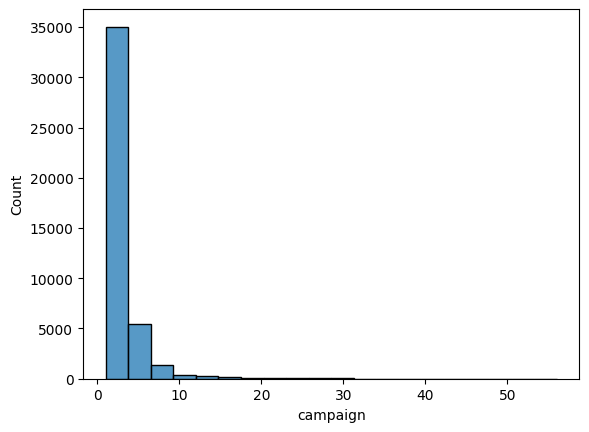

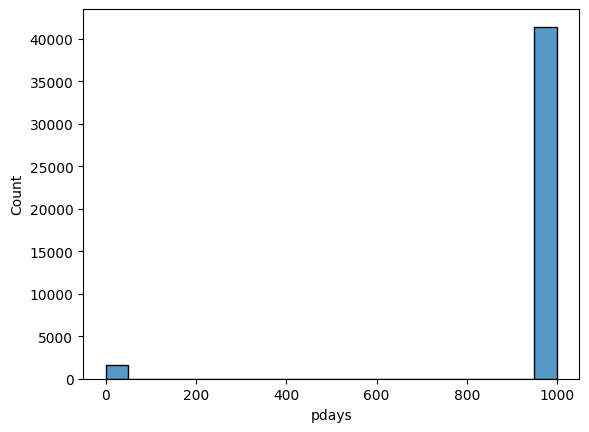

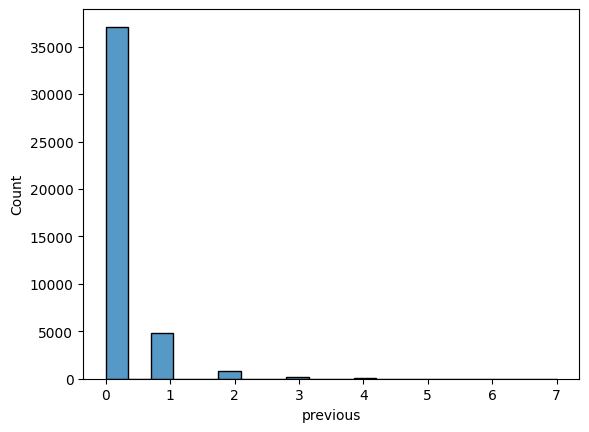

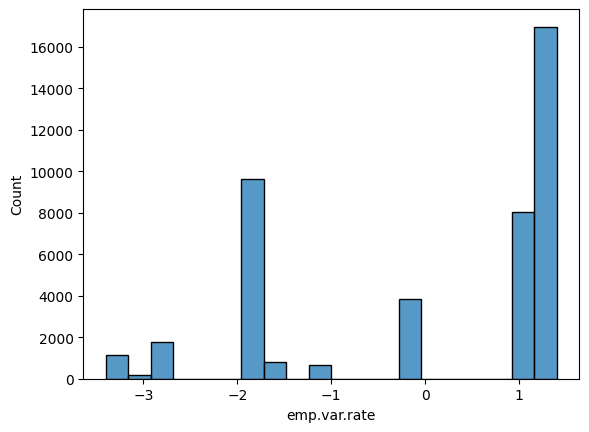

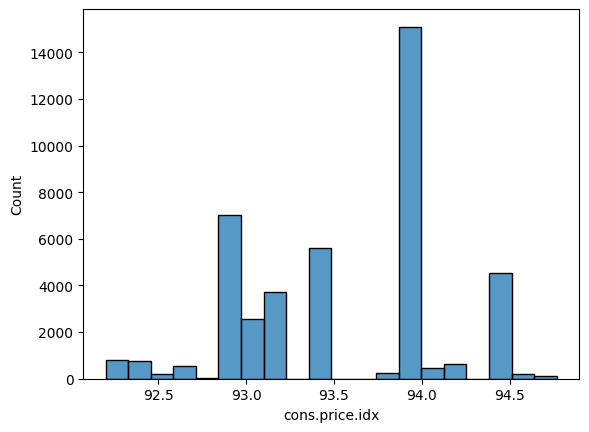

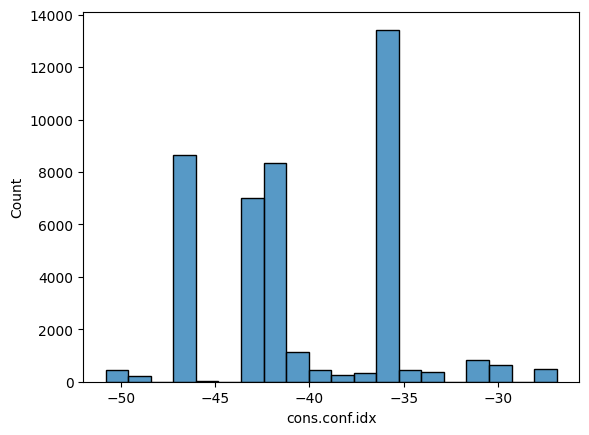

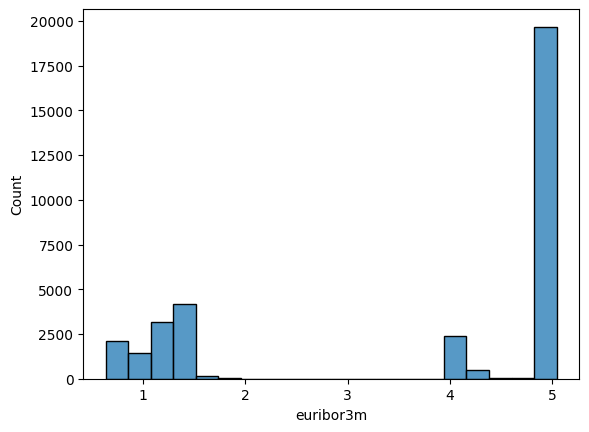

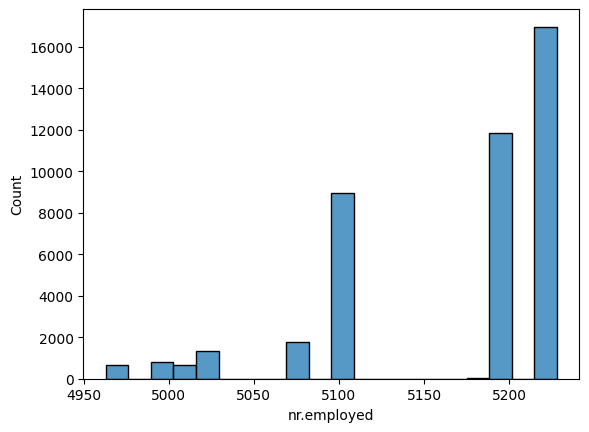

In [22]:
for col in columns_num:
 plt.figure()
 sns.histplot(df_bank[col], bins=20)
 plt.show()

## Boxplot

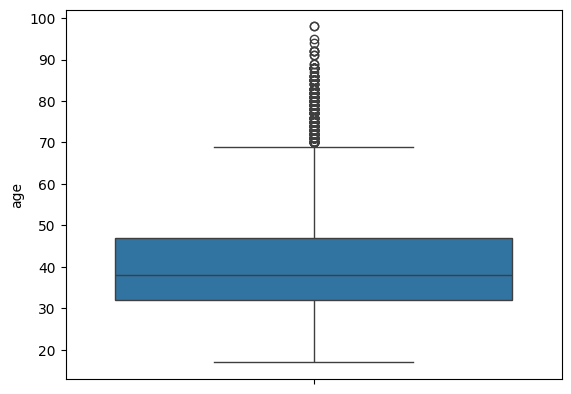

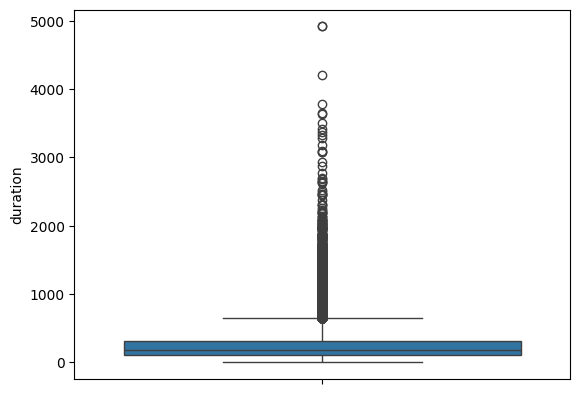

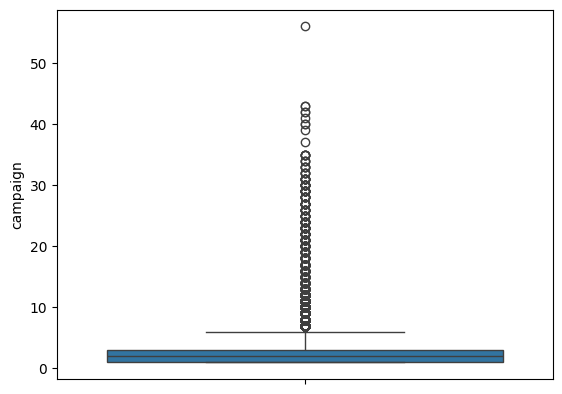

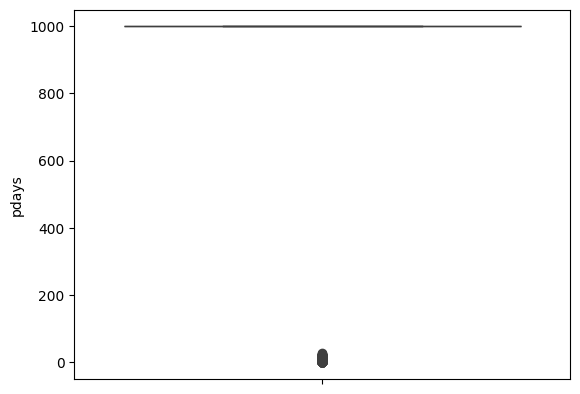

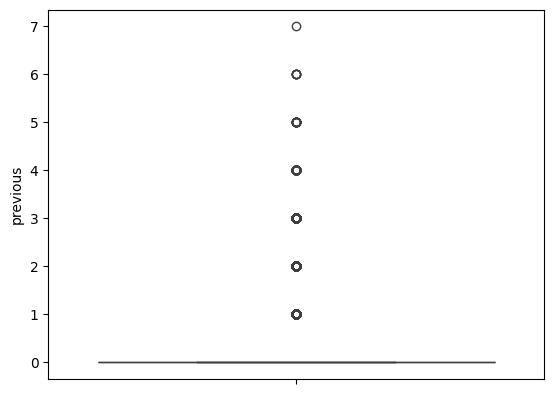

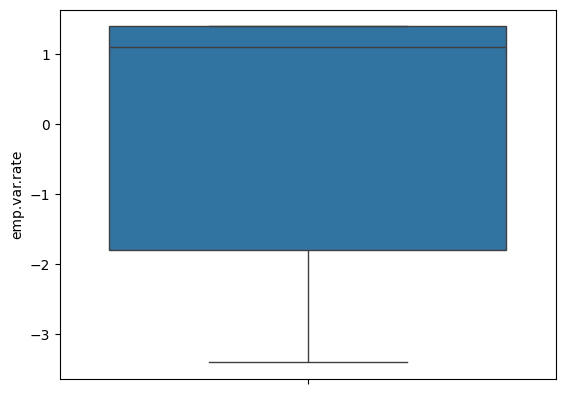

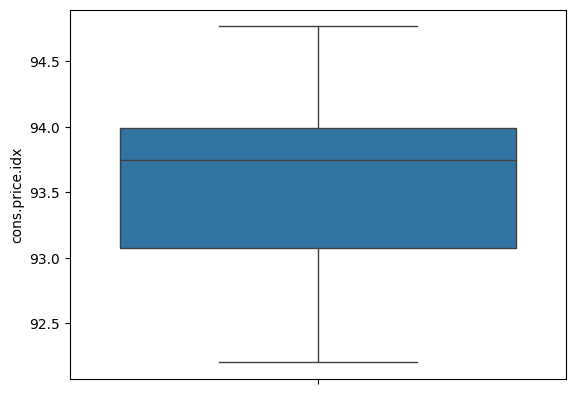

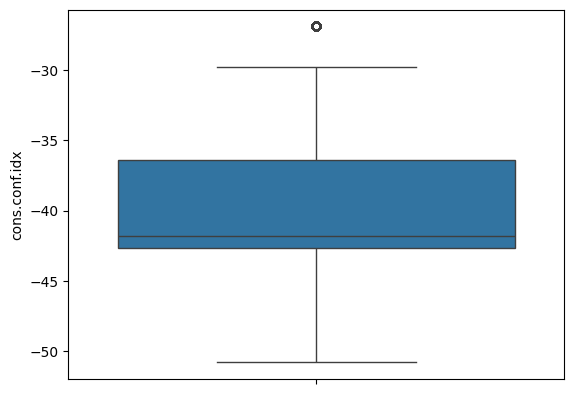

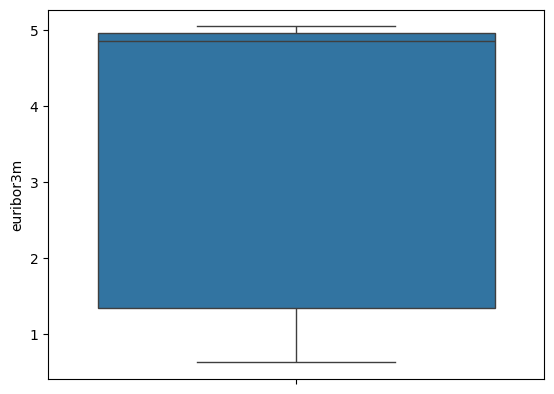

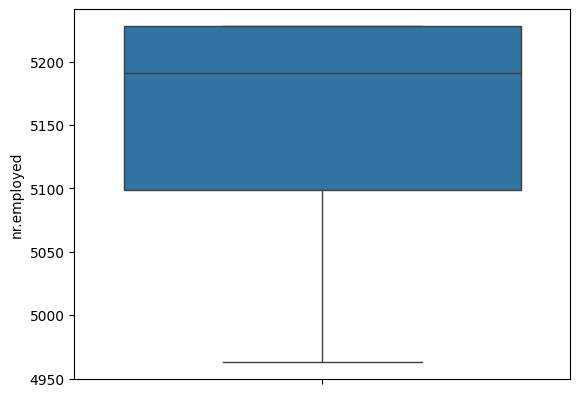

In [ ]:
for col in columns_num:
 plt.figure()
 sns.boxplot(df_bank[col])
 plt.show()

## Countplot

Distribución de la columna job


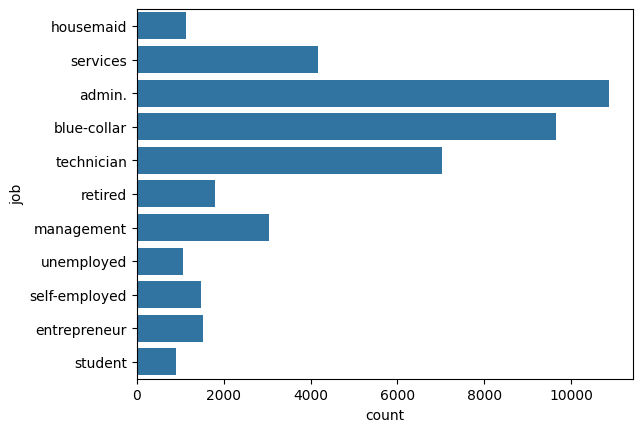

Distribución de la columna marital


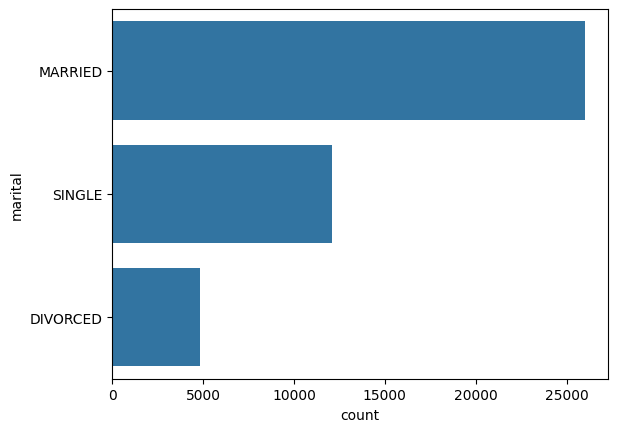

Distribución de la columna education


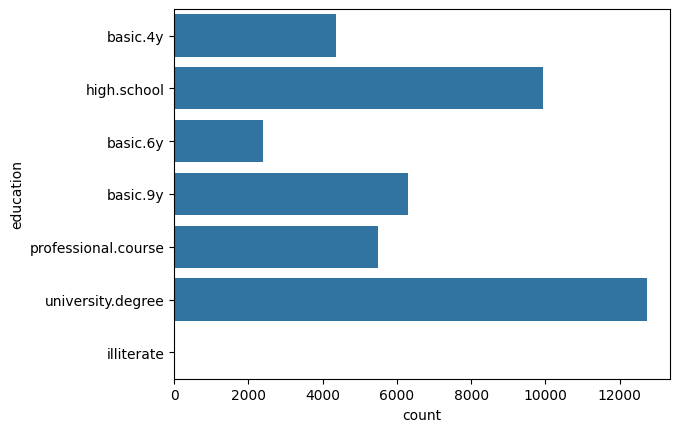

Distribución de la columna default


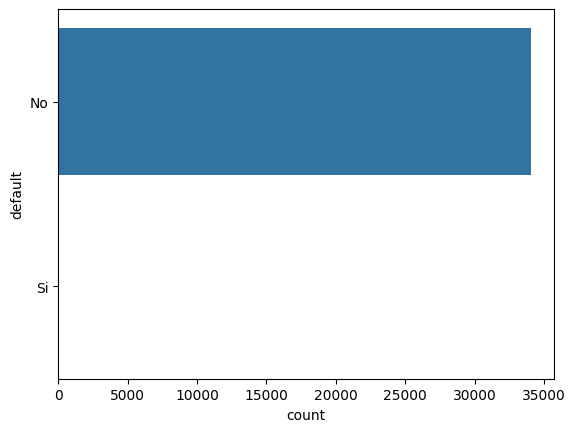

Distribución de la columna housing


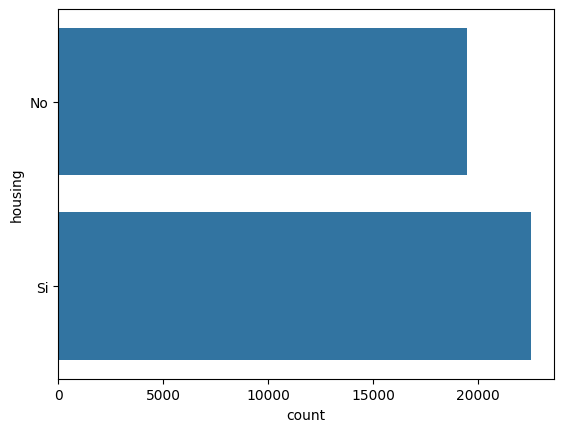

Distribución de la columna loan


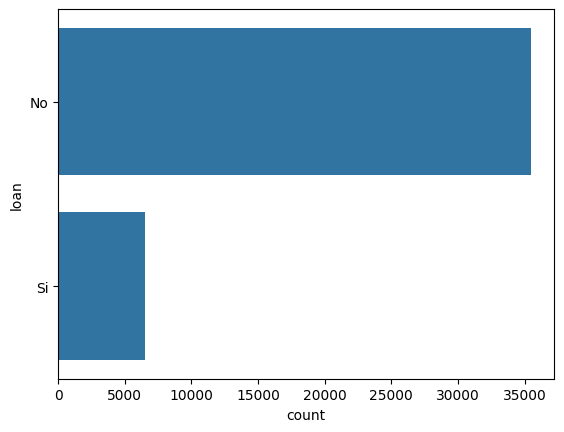

Distribución de la columna contact


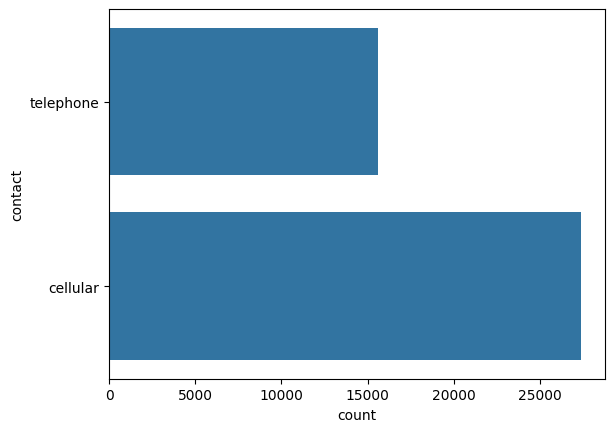

Distribución de la columna poutcome


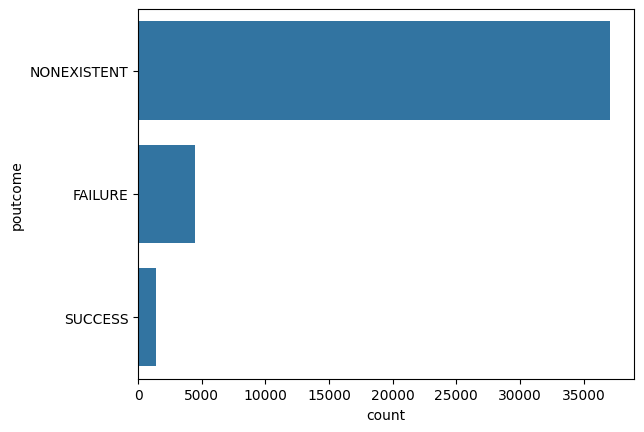

Distribución de la columna y


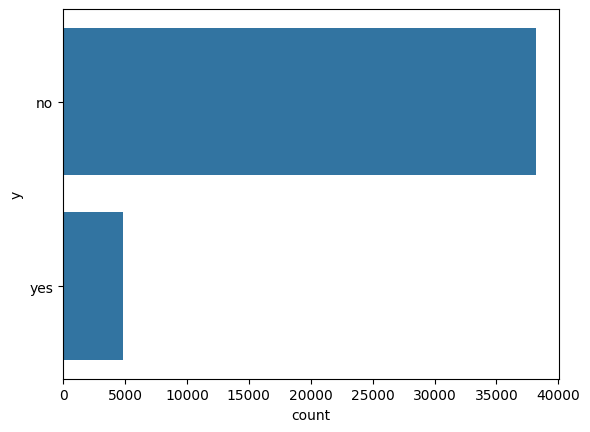

La columna date tiene demasiadas categorías: 1825
La columna id_ tiene demasiadas categorías: 43000


In [28]:
columns_cate = df_bank.select_dtypes(include= ['category', 'object']).columns

columns_cate

for col in columns_cate:
    if df_bank[col].nunique() > 200:
        print(f'La columna {col} tiene demasiadas categorías: {df_bank[col].nunique()}')
        continue
    print(f'Distribución de la columna {col}')
    plt.figure()
    sns.countplot(df_bank[col])
    plt.show()

In [ ]:
df_union.drop(columns='Unnamed: 0', inplace=True)